1: Explain the differences between AI, ML, Deep Learning (DL), and Data
Science (DS).
-  Artificial Intelligence (AI): AI is a broad field concerned with building smart machines capable of performing tasks that typically require human intelligence, such as reasoning and decision-making.

   Machine Learning (ML): ML is a subset of AI that focuses on algorithms that enable computers to learn from data and improve over time without explicit programming.

   Deep Learning (DL): DL is a type of ML that uses neural networks with many layers to learn complex representations, especially effective in tasks like image and speech recognition.

   Data Science (DS): DS is an interdisciplinary field involving techniques to extract insights and knowledge from data, often using tools from statistics, ML, and computer science.

2: What are the types of machine learning? Describe each with one
real-world example.
-  upervised Learning: Learning from labeled data. Example: Predicting student grades based on past performance.

   Unsupervised Learning: Learning from unlabeled data. Example: Customer segmentation in marketing based on buying patterns.

   Reinforcement Learning: Learning through feedback, rewards, or penalties. Example: A robot learning to walk using trial and error

3: Define overfitting, underfitting, and the bias-variance tradeoff in machine
learning.
-  Overfitting: The model learns not only the general pattern but also the noise in the training data, resulting in poor performance on new data.

   Underfitting: The model fails to capture the underlying structure of the data and performs badly both on the training and new data.

   Bias-Variance Tradeoff: An ideal model should strike a balance between bias (error due to overly simplistic assumptions) and variance (error due to too much sensitivity to data specifics), achieving good generalization


4: What are outliers in a dataset, and list three common techniques for
handling them.
-  Outliers:

   These are data points that are significantly different from others in the dataset.

   Techniques:

   Removing outliers based on statistical thresholds

   Transforming data (log transformations, etc.)

   Using robust models or algorithms that are not sensitive to outliers

5: Explain the process of handling missing values and mention one
imputation technique for numerical and one for categorical data
-  Process: Analyze the missing data, choose an imputation method, and apply it appropriately.

   Numerical Imputation: Use mean or median to fill missing values in numeric columns.

   Categorical Imputation: Use mode (most common value) to fill missing values in categorical columns

6: Write a Python program that:
● Creates a synthetic imbalanced dataset with make_classification() from
sklearn.datasets.
● Prints the class distribution.
-  Task: Create a synthetic classification dataset using make_classification from scikit-learn with imbalanced classes and print the class distribution

In [4]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, random_state=42)


print(np.bincount(y))


[897 103]


7: Implement one-hot encoding using pandas for the following
list of colors:
['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.


In [5]:
import pandas as pd

colors = ["Red", "Green", "Blue", "Green", "Red"]
df = pd.DataFrame({'Color': colors})
print(pd.get_dummies(df))


   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


 8: Write a Python script to:

● Generate 1000 samples from a normal distribution.

● Introduce 50 random missing values.

● Fill missing values with the column mean.

● Plot a histogram before and after imputation

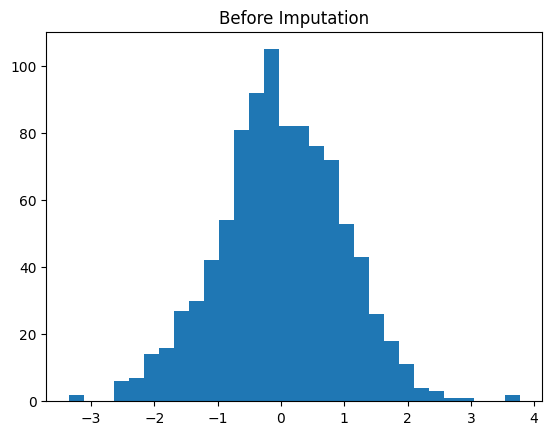

/tmp/ipython-input-1207631088.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Samples"].fillna(df["Samples"].mean(), inplace=True)


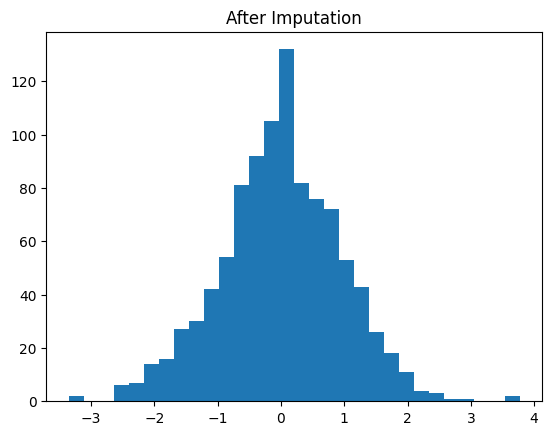

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.random.normal(size=1000)
missing_indices = np.random.choice(1000, 50, replace=False)
data[missing_indices] = np.nan
df = pd.DataFrame(data, columns=["Samples"])

plt.hist(df["Samples"].dropna(), bins=30)
plt.title("Before Imputation")
plt.show()

df["Samples"].fillna(df["Samples"].mean(), inplace=True)
plt.hist(df["Samples"], bins=30)
plt.title("After Imputation")
plt.show()


9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,
20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.


In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([2, 5, 10, 15, 20]).reshape(-1, 1)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
print(scaled.ravel())


[0.         0.16666667 0.44444444 0.72222222 1.        ]


10. You are working as a data scientist for a retail company. You receive a customer
transaction dataset that contains:

● Missing ages,

● Outliers in transaction amount,

● A highly imbalanced target (fraud vs. non-fraud),

● Categorical variables like payment method.

Explain the step-by-step data preparation plan you’d follow before training a machine learning
model. Include how you’d address missing data, outliers, imbalance, and encoding.


In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


np.random.seed(0)
rows = 1000
data = {
    'Age': np.random.normal(40, 12, rows),
    'TransactionAmount': np.random.normal(1000, 300, rows),
    'PaymentMethod': np.random.choice(['Credit', 'Debit', 'UPI', 'Cash'], rows),
    'IsFraud': np.random.choice([0, 1], rows, p=[0.95, 0.05])
}
df = pd.DataFrame(data)


missing_indices = np.random.choice(rows, 80, replace=False)
df.loc[missing_indices, 'Age'] = np.nan


outlier_indices = np.random.choice(rows, 10, replace=False)
df.loc[outlier_indices, 'TransactionAmount'] = df['TransactionAmount'] * 10



imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])



q1 = df['TransactionAmount'].quantile(0.25)
q3 = df['TransactionAmount'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[(df['TransactionAmount'] >= lower) & (df['TransactionAmount'] <= upper)]


df = pd.get_dummies(df, columns=['PaymentMethod'])


count_nonfraud = df['IsFraud'].value_counts()[0]
count_fraud = df['IsFraud'].value_counts()[1]
if count_fraud > 0:
    df_fraud = df[df['IsFraud'] == 1]
    df_nonfraud = df[df['IsFraud'] == 0]
    df_fraud_upsampled = df_fraud.sample(count_nonfraud, replace=True)
    df_balanced = pd.concat([df_nonfraud, df_fraud_upsampled], axis=0)
else:
    df_balanced = df.copy()


features = df_balanced.drop('IsFraud', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print('Shape after outlier removal:', df.shape)
print('Class balance before upsampling:', df['IsFraud'].value_counts().to_dict())
print('Class balance after upsampling:', df_balanced['IsFraud'].value_counts().to_dict())
print('First rows of scaled feature matrix:')
print(pd.DataFrame(features_scaled, columns=features.columns).head())


Shape after outlier removal: (983, 7)
Class balance before upsampling: {0: 931, 1: 52}
Class balance after upsampling: {0: 931, 1: 931}
First rows of scaled feature matrix:
        Age  TransactionAmount  PaymentMethod_Cash  PaymentMethod_Credit  \
0  1.893280           0.570439           -0.565360             -0.580244   
1  0.603255           0.913643            1.768786             -0.580244   
2  1.150499          -0.427295           -0.565360             -0.580244   
3  2.344294           0.110216            1.768786             -0.580244   
4  1.991180           0.236008           -0.565360             -0.580244   

   PaymentMethod_Debit  PaymentMethod_UPI  
0             1.589502          -0.534707  
1            -0.629128          -0.534707  
2            -0.629128           1.870183  
3            -0.629128          -0.534707  
4            -0.629128           1.870183  
